# Exemplo - Multilayer Perceptron com TensorFlow

### Problema: Classificação de flores Iris

Atributos presentes no dataset:
1. comprimento da sépala em cm
2. largura da sépala em cm
3. comprimento da pétala em cm
4. largura da pétala em cm
5. classe:
    - Iris Setosa
    - Iris Versicolor
    - Iris Virgínia

#### Objetivo: Classificar uma flor Iris com base em suas medidas


<div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/1200px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" width="200" height="200" /> 
<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Blue_Flag%2C_Ottawa.jpg" width="200" height="200" />
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Iris_virginica_2.jpg/1200px-Iris_virginica_2.jpg" width="200" height="200" /> </div>

 Iris Setosa, Iris Versicolor, Iris Virginica, respectivamente.

In [17]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('iris.data')


# Split dataset
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

In [11]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

# Standardize features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Convert class labels into one-hot encoding
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values


In [12]:
# Create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, input_dim=4, activation='sigmoid'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

# Compile model
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Train model
history = model.fit(X_train_std, y_train_onehot, validation_split=0.2, epochs=100, batch_size=10)

Epoch 1/100
10/10 [==============================] - 4s 77ms/step - loss: 1.2154 - mse: 0.2489 - val_loss: 1.1697 - val_mse: 0.2382
Epoch 2/100
10/10 [==============================] - 0s 16ms/step - loss: 1.1361 - mse: 0.2305 - val_loss: 1.0889 - val_mse: 0.2200
Epoch 3/100
10/10 [==============================] - 0s 13ms/step - loss: 1.0764 - mse: 0.2173 - val_loss: 1.0347 - val_mse: 0.2079
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 1.0304 - mse: 0.2071 - val_loss: 0.9893 - val_mse: 0.1976
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 0.9867 - mse: 0.1972 - val_loss: 0.9424 - val_mse: 0.1867
Epoch 6/100
10/10 [==============================] - 0s 11ms/step - loss: 0.9419 - mse: 0.1868 - val_loss: 0.9022 - val_mse: 0.1771
Epoch 7/100
10/10 [==============================] - 0s 21ms/step - loss: 0.9026 - mse: 0.1774 - val_loss: 0.8658 - val_mse: 0.1686
Epoch 8/100
10/10 [==============================] - 0s 28ms/step - loss: 0.

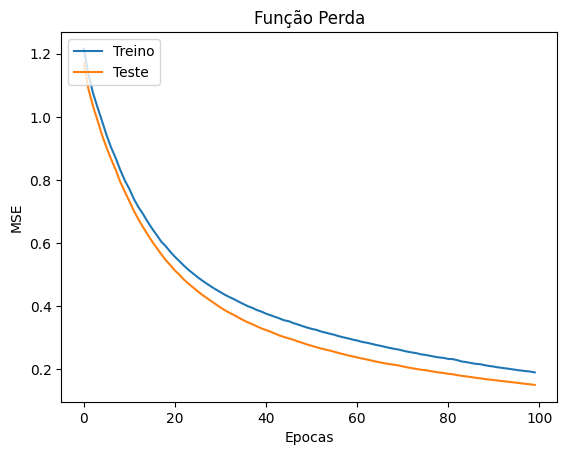

In [15]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Função Perda')
plt.ylabel('MSE')
plt.xlabel('Epocas')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()
